# Figure 5: Switching curve of mean-field equilibrium and N-player game

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.pyplot as plt
from mfg_computation import Parameters, mf_equilibrium, mf_optimum, compute_switching_curve
%matplotlib inline
import ternary


In [2]:
PARAMS = Parameters() # default parameters from paper
gamma = PARAMS.gamma # infection rate
rho = PARAMS.rho     # recovery rate
vac_min, theta = PARAMS.vac_min, PARAMS.theta # min/max vaccination rate
T = PARAMS.T # time horizon

c_V = PARAMS.c_V       # cost per unit time of vaccination
c_I = PARAMS.c_I      # cost per unit time of infection

# initial conditions
S0 = 0.4        # proportion of susceptible at t=0
I0 = 0.4        # proportion of infected at t=0

In [3]:
mfe_pol = np.load('data/equi_mf.npy')
#mfopt_pol = np.load('data/globalopt_mf.npy')
#sw_mfopt_x, sw_mfopt_y = compute_switching_curve(PARAMS, mfopt_pol)     
sw_mfe_x, sw_mfe_y = compute_switching_curve(PARAMS, mfe_pol)     
eq_N10_pol, Js, Ji = np.load('data/equi_N10.npy')
pol = eq_N10_pol[0,:,:]
sw_eq_N10_x, sw_eq_N10_y = compute_switching_curve(PARAMS, pol)
eq_N20_pol, Js, Ji = np.load('data/equi_N20.npy')
pol = eq_N20_pol[0,:,:]
sw_eq_N20_x, sw_eq_N20_y = compute_switching_curve(PARAMS, pol)
eq_N30_pol, Js, Ji = np.load('data/equi_N30.npy')
pol = eq_N30_pol[0,:,:]
sw_eq_N30_x, sw_eq_N30_y = compute_switching_curve(PARAMS, pol)
eq_N50_pol, Js, Ji = np.load('data/equi_N50.npy')
pol = eq_N50_pol[0,:,:]
sw_eq_N50_x, sw_eq_N50_y = compute_switching_curve(PARAMS, pol)

#eq_N20_pol = np.load('data/equi_N20.npy')
#sw_eq_N20_x, sw_eq_N20_y = compute_switching_curve(PARAMS, eq_N20_pol)
#eq_N30_pol = np.load('data/equi_N30.npy')
#sw_eq_N30_x, sw_eq_N30_y = compute_switching_curve(PARAMS, eq_N30_pol)
#eq_N50_pol = np.load('data/equi_N50.npy')
#sw_eq_N50_x, sw_eq_N50_y = compute_switching_curve(PARAMS, eq_N50_pol)


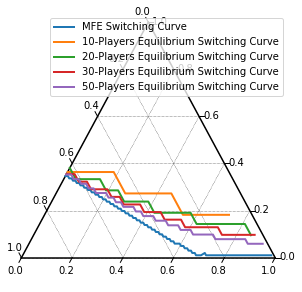

In [4]:
figure, tax = ternary.figure(scale=1.0)
figure.set_size_inches(5, 5)

tax.boundary()
tax.gridlines(multiple=0.2, color="black")
#tax.set_title("Plotting of sample trajectory data", fontsize=10)
sw_curve_mfe = []
for i in range(len(sw_mfe_x)):
    v_aux = [sw_mfe_x[i], sw_mfe_y[i], 1-sw_mfe_x[i]-sw_mfe_y[i]]
    sw_curve_mfe.append(v_aux)
sw_curve_eq_N10 = []
for i in range(len(sw_eq_N10_x)):
    v_aux = [sw_eq_N10_x[i], sw_eq_N10_y[i], 1-sw_eq_N10_x[i]-sw_eq_N10_y[i]]
    sw_curve_eq_N10.append(v_aux)
sw_curve_eq_N20 = []
for i in range(len(sw_eq_N20_x)):
    v_aux = [sw_eq_N20_x[i], sw_eq_N20_y[i], 1-sw_eq_N20_x[i]-sw_eq_N20_y[i]]
    sw_curve_eq_N20.append(v_aux)
sw_curve_eq_N30 = []
for i in range(len(sw_eq_N30_x)):
    v_aux = [sw_eq_N30_x[i], sw_eq_N30_y[i], 1-sw_eq_N30_x[i]-sw_eq_N30_y[i]]
    sw_curve_eq_N30.append(v_aux)
sw_curve_eq_N50 = []
for i in range(len(sw_eq_N50_x)):
    v_aux = [sw_eq_N50_x[i], sw_eq_N50_y[i], 1-sw_eq_N50_x[i]-sw_eq_N50_y[i]]
    sw_curve_eq_N50.append(v_aux)
    
# Plot the data
tax.plot(sw_curve_mfe, linewidth=2.0, label="MFE Switching Curve")
tax.plot(sw_curve_eq_N10, linewidth=2.0, label="10-Players Equilibrium Switching Curve")
tax.plot(sw_curve_eq_N20, linewidth=2.0, label="20-Players Equilibrium Switching Curve")
tax.plot(sw_curve_eq_N30, linewidth=2.0, label="30-Players Equilibrium Switching Curve")
tax.plot(sw_curve_eq_N50, linewidth=2.0, label="50-Players Equilibrium Switching Curve")
tax.ticks(axis='lbr', multiple=0.2, linewidth=1, tick_formats="%.1f", offset=0.02)

tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()
tax.legend()
tax.show()